In [55]:
import pandas as pd

# Load the dataset
file_path = 'baseline_data.csv'
df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values if any (example: using forward fill)
df.fillna(method='ffill', inplace=True)

# Display basic statistics
print(df.describe())


                           device_temperature  device_humidity  \
time                                                             
2023-03-15 15:00:00+08:00               20.24             0.72   
2023-03-15 16:00:00+08:00               20.25             0.72   
2023-03-15 17:00:00+08:00               20.25             0.70   
2023-03-15 18:00:00+08:00               20.25             0.70   
2023-03-15 19:00:00+08:00               20.17             0.69   

                           climate_temperature  climate_humidity  
time                                                              
2023-03-15 15:00:00+08:00                 31.0              0.52  
2023-03-15 16:00:00+08:00                 31.0              0.52  
2023-03-15 17:00:00+08:00                 30.0              0.55  
2023-03-15 18:00:00+08:00                 30.0              0.59  
2023-03-15 19:00:00+08:00                 29.0              0.58  
device_temperature     0
device_humidity        0
climate_temperatur

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df[['device_temperature', 'device_humidity', 'climate_temperature', 'climate_humidity']] = scaler.fit_transform(
    df[['device_temperature', 'device_humidity', 'climate_temperature', 'climate_humidity']]
)

# Feature engineering
df['temp_diff'] = df['device_temperature'] - df['climate_temperature']
df['humidity_diff'] = df['device_humidity'] - df['climate_humidity']

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Assume labels are in a column 'label' if available, otherwise create dummy labels for demonstration
if 'label' not in df.columns:
    train['label'] = 1
    test['label'] = -1  # Marking test data as anomaly for demonstration


C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\2186886409.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['label'] = 1
C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\2186886409.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['label'] = -1  # Marking test data as anomaly for demonstration


                           device_temperature  device_humidity  \
time                                                             
2023-03-15 15:00:00+08:00               20.24             0.72   
2023-03-15 16:00:00+08:00               20.25             0.72   
2023-03-15 17:00:00+08:00               20.25             0.70   
2023-03-15 18:00:00+08:00               20.25             0.70   
2023-03-15 19:00:00+08:00               20.17             0.69   

                           climate_temperature  climate_humidity  
time                                                              
2023-03-15 15:00:00+08:00                 31.0              0.52  
2023-03-15 16:00:00+08:00                 31.0              0.52  
2023-03-15 17:00:00+08:00                 30.0              0.55  
2023-03-15 18:00:00+08:00                 30.0              0.59  
2023-03-15 19:00:00+08:00                 29.0              0.58  
device_temperature     0
device_humidity        0
climate_temperatur

C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\3433768266.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['label'] = 1
C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\3433768266.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['label'] = 1
C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\3433768266.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

24/24 [==============================] - 1s 20ms/step - loss: 0.2102 - val_loss: 0.1740
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1235 - val_loss: 0.0618
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.0324
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0286 - val_loss: 0.0109
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0030
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Length of test set: 234
Lengt

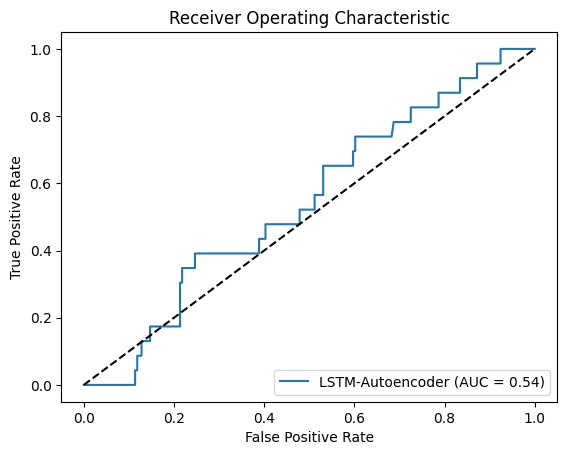

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import roc_curve, auc

# Load the dataset
file_path = 'baseline_data.csv'
df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values if any (example: using forward fill)
df.fillna(method='ffill', inplace=True)

# Display basic statistics
print(df.describe())

# Normalize the data
scaler = MinMaxScaler()
df[['device_temperature', 'device_humidity', 'climate_temperature', 'climate_humidity']] = scaler.fit_transform(
    df[['device_temperature', 'device_humidity', 'climate_temperature', 'climate_humidity']]
)

# Feature engineering
df['temp_diff'] = df['device_temperature'] - df['climate_temperature']
df['humidity_diff'] = df['device_humidity'] - df['climate_humidity']

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Create labels for demonstration: 1 for normal, -1 for anomalies
# Let's assume the last 10% of the test set as anomalies for this example
num_anomalies = int(len(test) * 0.1)
train['label'] = 1
test['label'] = 1
test['label'][-num_anomalies:] = -1

# Prepare the data for LSTM (reshaping)
X_train = train[['device_temperature', 'device_humidity', 'climate_temperature', 'climate_humidity', 'temp_diff', 'humidity_diff']].values
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

X_test = test[['device_temperature', 'device_humidity', 'climate_temperature', 'climate_humidity', 'temp_diff', 'humidity_diff']].values
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Autoencoder model
model = Sequential([
    LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    RepeatVector(X_train.shape[1]),
    LSTM(100, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train.shape[2]))
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict and calculate reconstruction error
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=2)

X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=2)

# Flatten the arrays to ensure they are 1D
train_mae_loss = train_mae_loss.flatten()
test_mae_loss = test_mae_loss.flatten()

# Ensure lengths match
print(f"Length of test set: {len(test)}")
print(f"Length of test_mae_loss: {len(test_mae_loss)}")
print(f"Length of test_labels: {len(test['label'])}")

# Check shapes of all arrays
print(f"Shape of test_labels: {test['label'].shape}")
print(f"Shape of test_mae_loss: {test_mae_loss.shape}")

# Function to plot ROC curves
def plot_roc(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores, pos_label=-1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Ensure the label column is also adjusted
test_labels = test['label']

plt.figure()
plot_roc(test_labels, test_mae_loss, 'LSTM-Autoencoder')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


                           device_temperature  device_humidity  \
time                                                             
2023-03-15 15:00:00+08:00               20.24             0.72   
2023-03-15 16:00:00+08:00               20.25             0.72   
2023-03-15 17:00:00+08:00               20.25             0.70   
2023-03-15 18:00:00+08:00               20.25             0.70   
2023-03-15 19:00:00+08:00               20.17             0.69   

                           climate_temperature  climate_humidity  
time                                                              
2023-03-15 15:00:00+08:00                 31.0              0.52  
2023-03-15 16:00:00+08:00                 31.0              0.52  
2023-03-15 17:00:00+08:00                 30.0              0.55  
2023-03-15 18:00:00+08:00                 30.0              0.59  
2023-03-15 19:00:00+08:00                 29.0              0.58  
device_temperature     0
device_humidity        0
climate_temperatur

C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\3099448831.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['label'] = 1
C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\3099448831.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['label'] = 1
C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\3099448831.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

24/24 [==============================] - 1s 8ms/step - loss: 0.2160 - val_loss: 0.1870
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1404 - val_loss: 0.0666
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0630 - val_loss: 0.0362
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0360 - val_loss: 0.0171
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0064
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 11/50
24/24 [===========

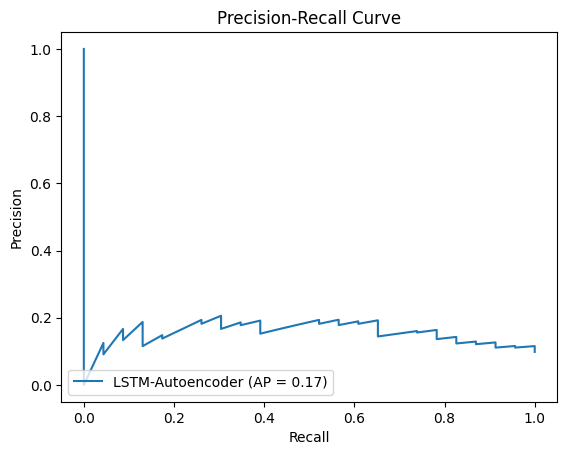

LSTM Autoencoder Confusion Matrix:
 [[ 21 190]
 [  3  20]]
LSTM Autoencoder Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.10      0.18       211
          -1       0.10      0.87      0.17        23

    accuracy                           0.18       234
   macro avg       0.49      0.48      0.18       234
weighted avg       0.80      0.18      0.18       234



In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, classification_report

# Load the dataset
file_path = 'baseline_data.csv'
df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values if any (example: using forward fill)
df.fillna(method='ffill', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df[['device_temperature', 'device_humidity', 'climate_temperature', 'climate_humidity']] = scaler.fit_transform(
    df[['device_temperature', 'device_humidity', 'climate_temperature', 'climate_humidity']]
)

# Feature engineering
df['temp_diff'] = df['device_temperature'] - df['climate_temperature']
df['humidity_diff'] = df['device_humidity'] - df['climate_humidity']

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Create labels for demonstration: 1 for normal, -1 for anomalies
num_anomalies = int(len(test) * 0.1)
train['label'] = 1
test['label'] = 1
test['label'][-num_anomalies:] = -1

# Prepare the data for LSTM (reshaping)
X_train = train[['device_temperature', 'device_humidity', 'climate_temperature', 'climate_humidity', 'temp_diff', 'humidity_diff']].values
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

X_test = test[['device_temperature', 'device_humidity', 'climate_temperature', 'climate_humidity', 'temp_diff', 'humidity_diff']].values
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Autoencoder model
model = Sequential([
    LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    RepeatVector(X_train.shape[1]),
    LSTM(100, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train.shape[2]))
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict and calculate reconstruction error
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=2)

X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=2)

# Flatten the arrays to ensure they are 1D
train_mae_loss = train_mae_loss.flatten()
test_mae_loss = test_mae_loss.flatten()

# Precision-Recall Curve
def plot_precision_recall(y_true, y_scores, label):
    precision, recall, _ = precision_recall_curve(y_true, y_scores, pos_label=-1)
    average_precision = average_precision_score(y_true, y_scores, pos_label=-1)
    plt.plot(recall, precision, label=f'{label} (AP = {average_precision:.2f})')

plt.figure()
plot_precision_recall(test['label'], test_mae_loss, 'LSTM-Autoencoder')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix and Classification Report
threshold = np.percentile(test_mae_loss, 90)  # Adjust threshold as needed
y_pred = [1 if score > threshold else -1 for score in test_mae_loss]

cm = confusion_matrix(test['label'], y_pred, labels=[1, -1])
report = classification_report(test['label'], y_pred, labels=[1, -1])

print("LSTM Autoencoder Confusion Matrix:\n", cm)
print("LSTM Autoencoder Classification Report:\n", report)


                           device_temperature  device_humidity  \
time                                                             
2023-03-15 15:00:00+08:00               20.24             0.72   
2023-03-15 16:00:00+08:00               20.25             0.72   
2023-03-15 17:00:00+08:00               20.25             0.70   
2023-03-15 18:00:00+08:00               20.25             0.70   
2023-03-15 19:00:00+08:00               20.17             0.69   

                           climate_temperature  climate_humidity  
time                                                              
2023-03-15 15:00:00+08:00                 31.0              0.52  
2023-03-15 16:00:00+08:00                 31.0              0.52  
2023-03-15 17:00:00+08:00                 30.0              0.55  
2023-03-15 18:00:00+08:00                 30.0              0.59  
2023-03-15 19:00:00+08:00                 29.0              0.58  
device_temperature     0
device_humidity        0
climate_temperatur

C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\944816914.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['label'] = 1
C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\944816914.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['label'] = 1
C:\Users\Vincent\AppData\Local\Temp\ipykernel_16544\944816914.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

12/12 [==============================] - 1s 14ms/step - loss: 0.2766 - val_loss: 0.2791
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2390 - val_loss: 0.2226
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1731 - val_loss: 0.1227
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0856 - val_loss: 0.0521
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0541 - val_loss: 0.0311
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0351 - val_loss: 0.0200
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.0120
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0150 - val_loss: 0.0107
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0097
Epoch 10/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.0079
Epoch 11/20
12/12 [==========

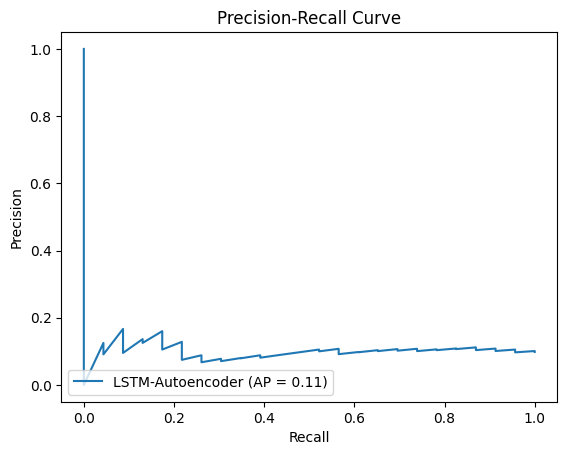

LSTM Autoencoder Confusion Matrix:
 [[201  10]
 [ 21   2]]
LSTM Autoencoder Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.95      0.93       211
          -1       0.17      0.09      0.11        23

    accuracy                           0.87       234
   macro avg       0.54      0.52      0.52       234
weighted avg       0.83      0.87      0.85       234



In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, classification_report

# Load the dataset
file_path = 'baseline_data.csv'
df = pd.read_csv(file_path, parse_dates=['time'], index_col='time')

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values if any (example: using forward fill)
df.fillna(method='ffill', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df[['device_temperature', 'climate_temperature', 'climate_humidity']] = scaler.fit_transform(
    df[['device_temperature', 'climate_temperature', 'climate_humidity']]
)

# Feature engineering
df['temp_diff'] = df['device_temperature'] - df['climate_temperature']
df['humidity_diff'] = df['climate_humidity']
df['temp_ma'] = df['device_temperature'].rolling(window=3).mean()

# Fill any NaN values resulting from the moving average calculation
df.fillna(method='bfill', inplace=True)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Create labels for demonstration: 1 for normal, -1 for anomalies
num_anomalies = int(len(test) * 0.1)
train['label'] = 1
test['label'] = 1
test['label'][-num_anomalies:] = -1

# Prepare the data for LSTM (reshaping)
features = ['device_temperature', 'climate_temperature', 'climate_humidity', 'temp_diff', 'humidity_diff', 'temp_ma']
X_train = train[features].values
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

X_test = test[features].values
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Autoencoder model with modified hyperparameters
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    RepeatVector(X_train.shape[1]),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train.shape[2]))
])

# Compile the model with a different optimizer and learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model with a different batch size and number of epochs
model.fit(X_train, X_train, epochs=20, batch_size=64, validation_split=0.2)

# Predict and calculate reconstruction error
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=2)

X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=2)

# Flatten the arrays to ensure they are 1D
train_mae_loss = train_mae_loss.flatten()
test_mae_loss = test_mae_loss.flatten()

# Precision-Recall Curve
def plot_precision_recall(y_true, y_scores, label):
    precision, recall, _ = precision_recall_curve(y_true, y_scores, pos_label=-1)
    average_precision = average_precision_score(y_true, y_scores, pos_label=-1)
    plt.plot(recall, precision, label=f'{label} (AP = {average_precision:.2f})')

plt.figure()
plot_precision_recall(test['label'], test_mae_loss, 'LSTM-Autoencoder')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Confusion Matrix and Classification Report
threshold = np.percentile(test_mae_loss, 95)  # Adjust threshold as needed
y_pred = [1 if score < threshold else -1 for score in test_mae_loss]

cm = confusion_matrix(test['label'], y_pred, labels=[1, -1])
report = classification_report(test['label'], y_pred, labels=[1, -1])

print("LSTM Autoencoder Confusion Matrix:\n", cm)
print("LSTM Autoencoder Classification Report:\n", report)
